In [1]:
using Polynomials,SpecialFunctions
using LinearAlgebra
using NLsolve
using Plots,LaTeXStrings
default(markersize=3,linewidth=1.5)
include("FNC.jl")

Main.FNC

# Example 4.1.1

In the theory of vibrations of a circular drum, the displacement of the drumhead can be expressed in terms of pure harmonic modes, 

$$J_m(\omega_{k,m} r) \cos(m\theta) \cos(c \omega_{k,m} t),$$

where $(r,\theta)$ are polar coordinates, $0\le r\le 1$, $t$ is time, $m$ is a positive integer, $c$ is a material parameter, and $J_m$ is a _Bessel function of the first kind_. The quantity $\omega_{k,m}$ is a resonant frequency and is a positive root of the equation  

$$J_m(\omega_{k,m}) = 0,$$ 

which states that the drumhead is clamped around the rim. Tabulating approximations to the zeros of Bessel functions has occupied countless mathematician-hours throughout the centuries. 

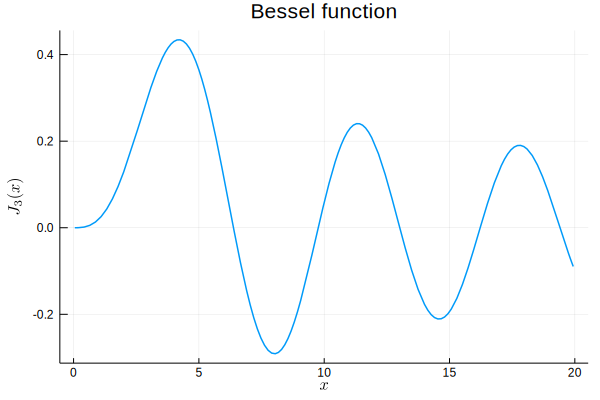

In [2]:
J3(x) = besselj(3,x)
plot(J3,0,20,
    grid=:xy,legend=:none,
    xaxis=(L"x"),yaxis=(L"J_3(x)"),title="Bessel function")

From the graph we see roots near 6, 10, 13, 16, and 19. We use `nlsolve` from the `NLsolve` package to find these roots accurately. (It uses vector variables, so we have to adapt it for use with scalars.)

In [3]:
omega = []
for guess = [6.,10.,13.,16.,19.]
    s = nlsolve(x->besselj(3,x[1]),[guess])
    omega = [omega;s.zero]
end
omega

5-element Array{Any,1}:
  6.380161895923975
  9.761023129981334
 13.015200721696122
 16.223466160318768
 19.40941522643161 

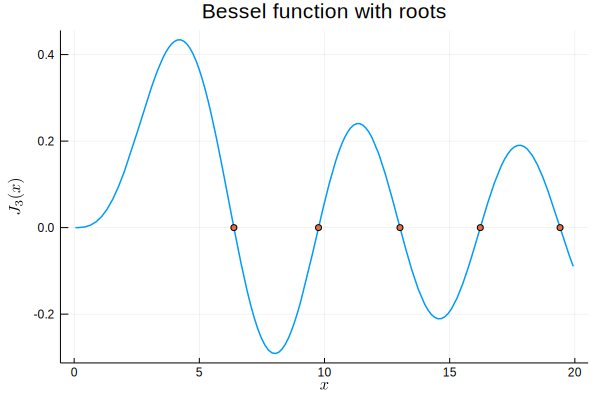

In [4]:
scatter!(omega,J3.(omega),title="Bessel function with roots")

# Example 4.1.2

Consider first the function

In [5]:
f  = x -> (x-1)*(x-2);

At the root $r=1$, we have $f'(r)=-1$. If the values of $f$ were perturbed at any point by noise of size, say, $0.05$, we can imagine finding the root of the function as though drawn with a thick line, whose edges we show here.

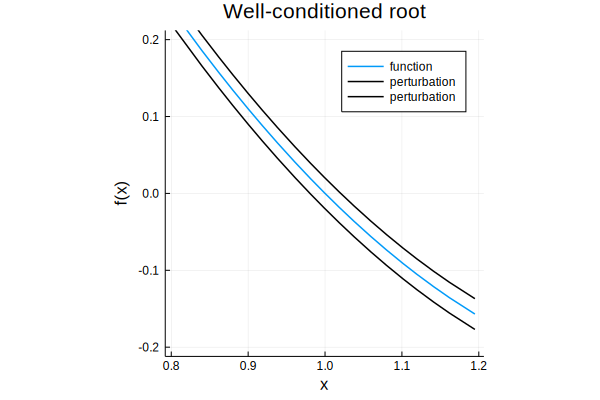

In [6]:
interval = [0.8,1.2]

plot(f,interval...,label="function",
    xlabel="x",yaxis=("f(x)",[-0.2,0.2]),aspect_ratio=1,title="Well-conditioned root")
plot!([x->f(x)+0.02,x->f(x)-0.02],interval...,label="perturbation",color=:black)

The possible values for a perturbed root all lie within the interval where the black lines intersect the $x$ axis. The width of that zone is about the same as the vertical distance between the lines.

By contrast, consider the function

In [7]:
f  = x -> (x-1)*(x-1.01);

Now $f'(1)=-0.01$, and the graph of $f$ will be much shallower near $x=1$. Look at the effect this has on our thick rendering:

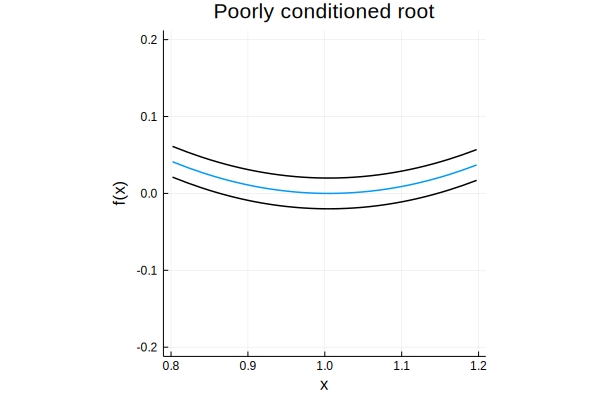

In [8]:
plot(f,interval...,label="",
    xlabel="x",yaxis=("f(x)",[-0.2,0.2]),title="Poorly conditioned root",aspect_ratio=1,leg=:top)
plot!([x->f(x)+0.02,x->f(x)-0.02],interval...,label="",color=:black)

The vertical displacements in this picture are exactly the same as before. But the potential _horizontal_ displacement of the root is much wider. In fact, if we perturb the function upward by the amount drawn here, the root disappears entirely!

# Example 4.2.1

Let's convert the roots of a quadratic polynomial $f(x)$ to a fixed point problem.

In [9]:
f = x -> x^2 - 4*x + 3.5
@show r = roots(Poly([3.5,-4,1]));

r = roots(Poly([3.5, -4, 1])) = [2.70711, 1.29289]


We'll define $g(x)=x-f(x)$. Intersections of its graph with the line $y=x$ are fixed points of $g$ and thus roots of $f$. (Only one is shown in the chosen plot range.) 

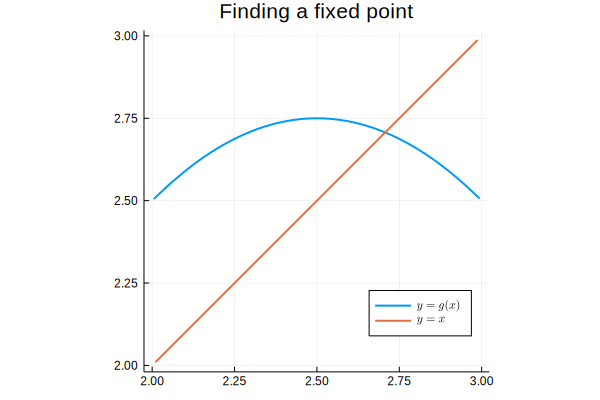

In [10]:
g = x -> x - f(x)
plt=plot([g,x->x],2,3,label=[L"y=g(x)",L"y=x"],aspect_ratio=1,linewidth=2,
    title="Finding a fixed point",legend=:bottomright)

If we evalaute $g(2.1)$, we get a value of almost 2.6. 

In [11]:
x = 2.1;  y = g(x)

2.5900000000000003

So $g(x)$ is considerably closer to a fixed point than $x$ was. The value $y=g(x)$ ought to become our new $x$ value! Changing the $x$ coordinate in this way is the same as following a horizontal line over to the graph of $y=x$.

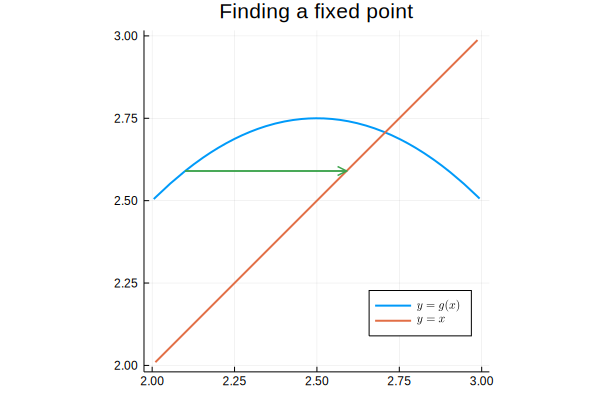

In [12]:
plot!([x,y],[y,y],label="",arrow=true)

Now we can compute a new value for $y$. We leave $x$ alone here, so we travel along a vertical line to the graph of $g$.

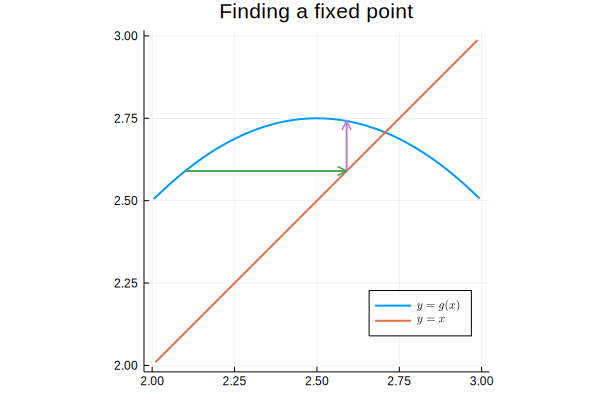

In [13]:
x = y;  y = g(x)
plot!([x,x],[x,y],label="",arrow=true)

You see that we are in a position to repeat these steps as often as we like. Let's apply them a few times and see the result. 

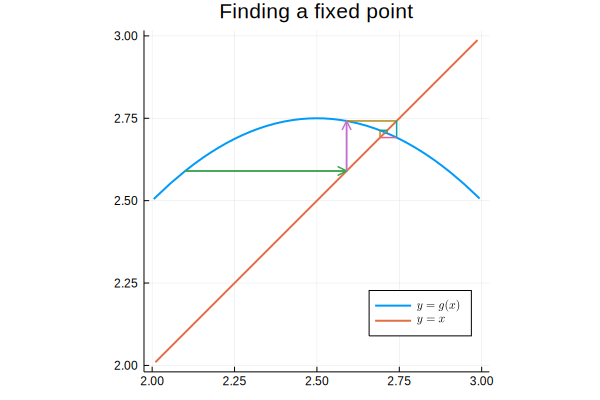

In [14]:
for k = 1:5
    plot!([x,y],[y,y],label="");  x = y;    # y --> new x
    y = g(x);  plot!([x,x],[x,y],label="")  # g(x) --> new y
end
display(plt)

The process spirals in beautifully toward the fixed point we seek. Our last estimate has almost 4 accurate digits.

In [15]:
abs(y-r[1])/r[1]

0.0001653094344995643

Now let's try to find the other fixed point $\approx 1.29$ in the same way. We'll use 1.3 as a starting approximation.

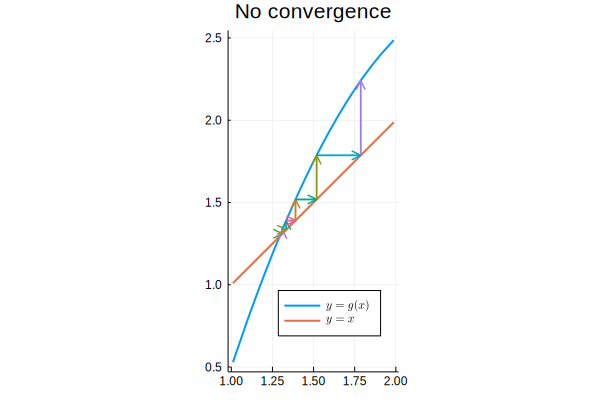

In [16]:
plt=plot([g,x->x],1,2,label=["\$y=g(x)\$","\$y=x\$"],aspect_ratio=1,linewidth=2,
    title="No convergence",legend=:bottomright)
x = 1.3; y = g(x);
for k = 1:5
    plot!([x,y],[y,y],label="",arrow=true);  x = y;    # y --> new x
    y = g(x);  plot!([x,x],[x,y],label="",arrow=true)  # g(x) --> new y
end
display(plt)

# Example 4.2.3

This time, the iteration is pushing us _away_ from the correct answer. 

In [17]:
f = x -> x^2 - 4*x + 3.5
@show r = roots(Poly([3.5,-4,1]));

r = roots(Poly([3.5, -4, 1])) = [2.70711, 1.29289]


Here is the fixed point iteration. This time we keep track of the whole sequence of approximations. 

In [18]:
g = x -> x - f(x);
x = 2.1; 
for k = 1:12
    x = [x;g(x[k])]
end
x

13-element Array{Float64,1}:
 2.1               
 2.5900000000000003
 2.7419            
 2.69148439        
 2.713333728386328 
 2.704488720332788 
 2.708184363256659 
 2.7066592708954196
 2.707291945752974 
 2.707030049225946 
 2.7071385587175025
 2.707093617492436 
 2.707112233593897 

It's easiest to construct and plot the sequence of errors. 

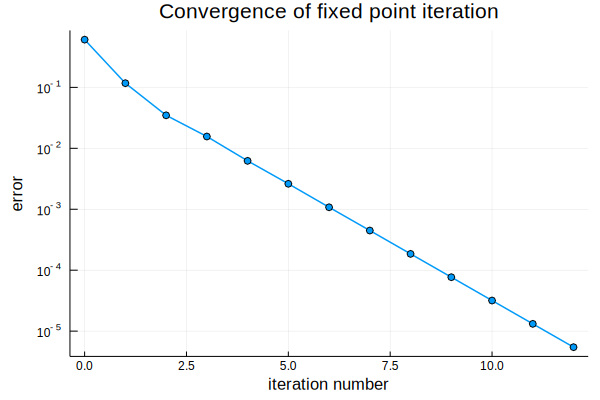

In [19]:
err = @. abs(x-r[1])
plot(0:12,err,m=:o,
    leg=:none,xaxis=("iteration number"),yaxis=("error",:log10),title="Convergence of fixed point iteration")

It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.  

In [20]:
p = polyfit(5:12,log.(err[5:12]),1)

Poly(-0.6680573888362207 - 0.8807181589724035*x)

We can exponentiate the slope to get the convergence constant $\sigma$.

In [21]:
sigma = exp(p.a[2])

0.41448513854897917

The numerical values of the error should decrease by a factor of $\sigma$ at each iteration. We can check this easily with an elementwise division.

In [22]:
@. err[9:12] / err[8:11]

4-element Array{Float64,1}:
 0.41376605208270323
 0.4143987269397045 
 0.4141368304158358 
 0.41424533989920437

The methods for finding $\sigma$ agree well.

# Example 4.3.1

Suppose we want to find a root of the function 

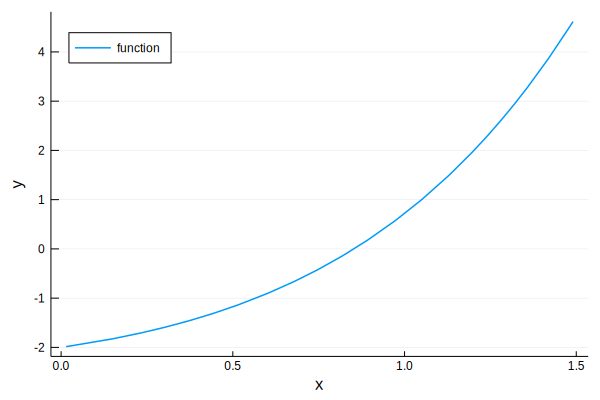

In [23]:
f = x -> x*exp(x) - 2

plot(f,0,1.5,label="function",grid=:y,
    xlabel="x",ylabel="y",legend=:topleft)

From the graph, it is clear that there is a root near $x=1$. So we call that our initial guess, $x_1$.

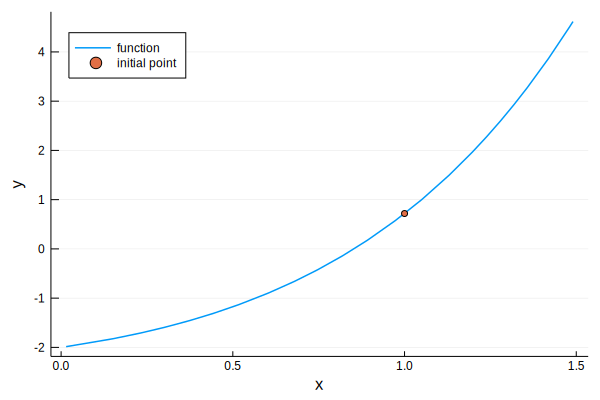

In [24]:
x1 = 1
f1 = f(x1)
scatter!([x1],[f1],label="initial point")

Next, we can compute the tangent line at the point $\bigl(x_1,f(x_1)\bigr)$, using the derivative.

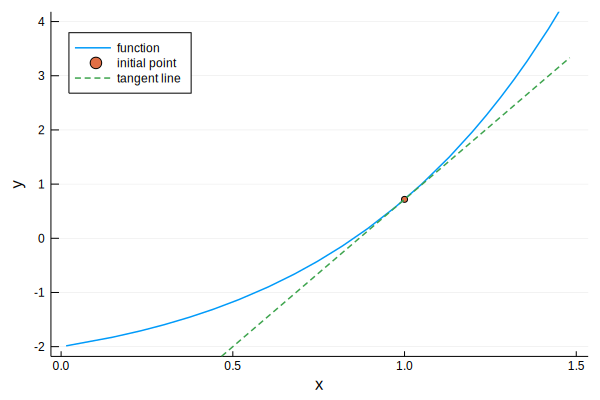

In [25]:
dfdx = x -> exp(x)*(x+1)
slope1 = dfdx(x1)
tangent1 = x -> f1 + slope1*(x-x1)

plot!(tangent1,0,1.5,l=:dash,label="tangent line",ylim=[-2,4])

In lieu of finding the root of $f$ itself, we settle for finding the root of the tangent line approximation, which is trivial. Call this $x_2$, our next approximation to the root.

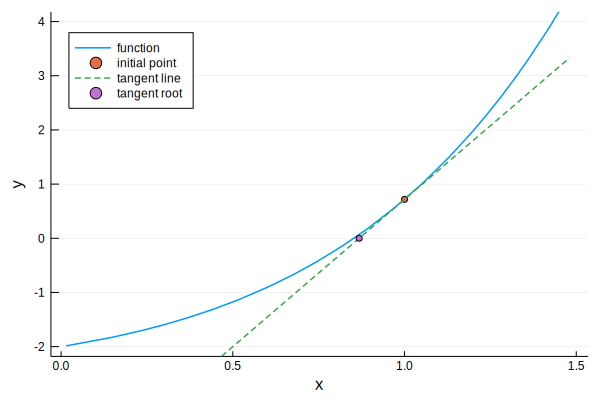

In [26]:
x2 = x1 - f1/slope1
scatter!([x2],[0],label="tangent root")

In [27]:
f2 = f(x2)

0.06716266657572145

The residual (value of $f$) is smaller than before, but not zero. So we repeat the process with a new tangent line based on the latest point on the curve.

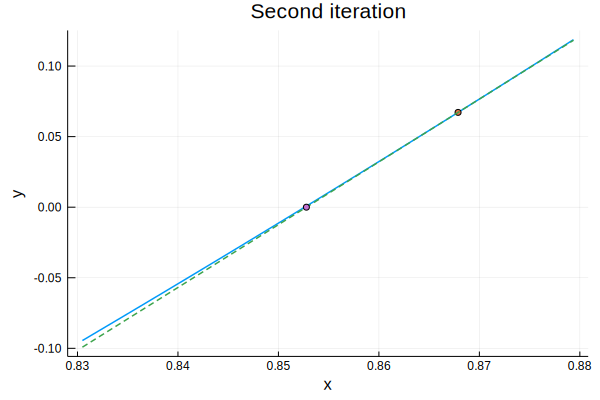

In [28]:
plot(f,0.83,0.88)
scatter!([x2],[f2])
slope2 = dfdx(x2)
tangent2 = x -> f2 + slope2*(x-x2)
plot!(tangent2,0.83,0.88,l=:dash)
x3 = x2 - f2/slope2
scatter!([x3],[0],
    legend=:none,xlabel="x",ylabel="y",title="Second iteration")

In [29]:
f3 = f(x3)

0.0007730906446230534

We appear to be getting closer to the true root each time. 

# Example 4.3.2

We again look at finding a solution of $xe^x=2$ near $x=1$. To apply Newton's method, we need to calculate values of both the residual function $f$ and its derivative.  

In [30]:
f = x -> x*exp(x) - 2;
dfdx = x -> exp(x)*(x+1);

We don't know the exact root, so we use `nlsolve` (from `NLsolve`) to determine the "true" value.

In [31]:
r = nlsolve(x -> f(x[1]),[1.]).zero

1-element Array{Float64,1}:
 0.8526055020137259

We use $x_1=1$ as a starting guess and apply the iteration in a loop, storing the sequence of iterates in a vector.

In [32]:
x = [1;zeros(6)]
for k = 1:6
    x[k+1] = x[k] - f(x[k]) / dfdx(x[k])
end
x

7-element Array{Float64,1}:
 1.0               
 0.8678794411714423
 0.8527833734164099
 0.8526055263689221
 0.852605502013726 
 0.8526055020137254
 0.8526055020137254

Here is the sequence of errors. 

In [33]:
err = @. x - r

7-element Array{Float64,1}:
  0.14739449798627413   
  0.015273939157716465  
  0.00017787140268399337
  2.4355196193148743e-8 
  1.1102230246251565e-16
 -4.440892098500626e-16 
 -4.440892098500626e-16 

Glancing at the exponents of the errors, they roughly form a neat doubling sequence until the error is comparable to machine precision. We can see this more precisely by taking logs.

In [34]:
logerr = @. log(abs(err))

7-element Array{Float64,1}:
  -1.9146426270180508
  -4.181607225912875 
  -8.634449725601385 
 -17.53052061416097  
 -36.7368005696771   
 -35.35050620855721  
 -35.35050620855721  

Quadratic convergence isn't as graphically distinctive as linear convergence.

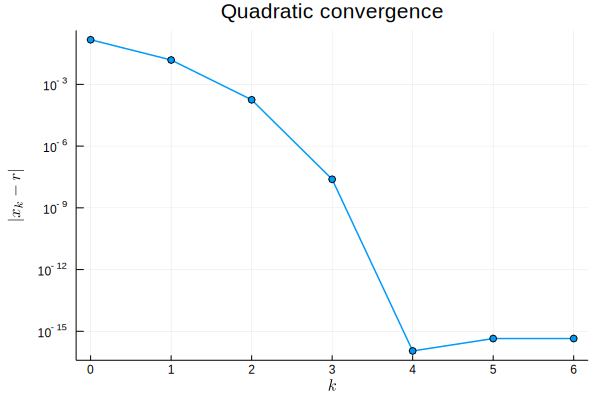

In [35]:
plot(0:6,abs.(err),m=:o,label="",
    xlabel="\$k\$",yaxis=(:log10,"\$|x_k-r|\$"),title="Quadratic convergence")

This looks faster than linear convergence, but it's not easy to say more. If we could use infinite precision, the curve would continue to steepen forever.

# Example 4.3.3

Suppose we want to solve $e^x=x+c$ for multiple values of $c$. We can create functions for $f$ and $f'$ in each case.

In [36]:
for c = [2,4,7.5,11]
    f = x -> exp(x) - x - c;
    dfdx = x -> exp(x) - 1;
    x = FNC.newton(f,dfdx,1.0);  r = x[end];
    println("root with c = $c is $r")
end

root with c = 2.0 is 1.1461932206205836
root with c = 4.0 is 1.7490313860127016
root with c = 7.5 is 2.2803781488230648
root with c = 11.0 is 2.610868638149876


There's a subtlety about the definition of `f`. It uses whatever value is assigned to `c` at the moment `f` is called. (This is unlike MATLAB, which locks in the value defined for `c` at the moment of definition.) If we later change the value assigned to `c`, the function is changed also.

In [37]:
c = 11;  f = x -> exp(x) - x - c;
@show f(0);

f(0) = -10.0


In [38]:
c = 100; 
@show f(0);

f(0) = -99.0


# Example 4.4.1

We return to finding a root of the equation $xe^x=2$.

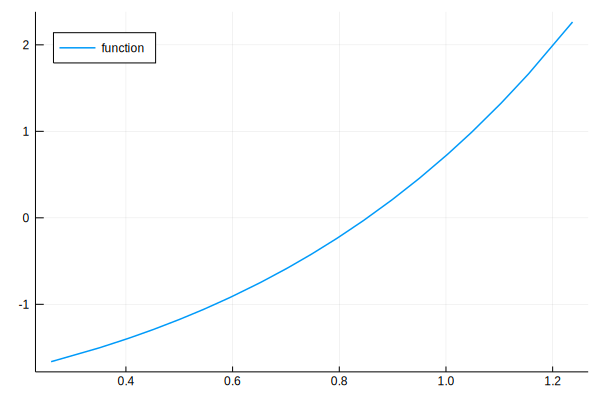

In [39]:
f = x -> x*exp(x) - 2;
plot(f,0.25,1.25,label="function",leg=:topleft)

From the graph, it's clear that there is a root near $x=1$. To be more precise, there is a root in the interval $[0.5,1]$. So let us take the endpoints of that interval as _two_ initial approximations. 

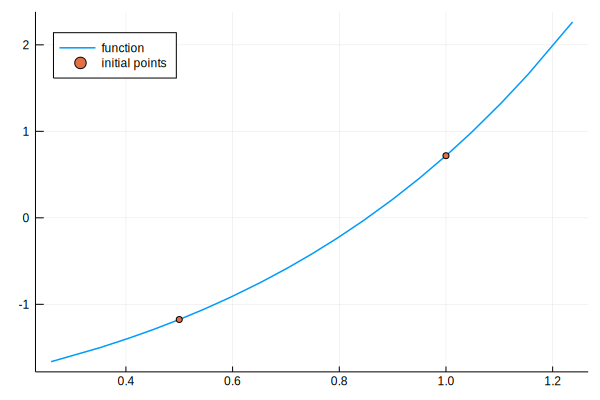

In [40]:
x1 = 1;    f1 = f(x1);
x2 = 0.5;  f2 = f(x2);
scatter!([x1,x2],[f1,f2],label="initial points")

Instead of constructing the tangent line by evaluating the derivative, we can construct a linear model function by drawing the line between the two points $\bigl(x_1,f(x_1)\bigr)$ and $\bigl(x_2,f(x_2)\bigr)$. This is called a _secant line_.

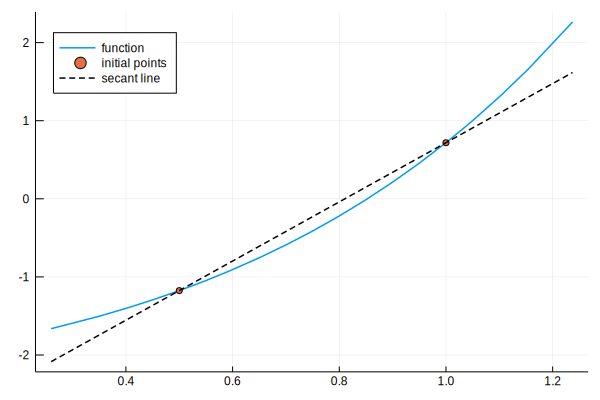

In [41]:
slope2 = (f2-f1) / (x2-x1);
secant2 = x -> f2 + slope2*(x-x2);
plot!(secant2,0.25,1.25,label="secant line",l=:dash,color=:black)

As before, the next value in the iteration is the root of this linear model. 

f3 = f(x3) = -0.17768144843679456


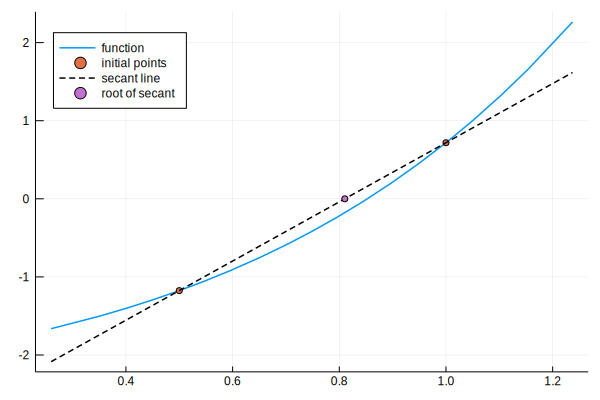

In [42]:
x3 = x2 - f2/slope2;
@show f3 = f(x3)
scatter!([x3],[0],label="root of secant")

For the next linear model, we use the line through the two most recent points. The next iterate is the root of that secant line, and so on.

In [43]:
slope3 = (f3-f2) / (x3-x2);
x4 = x3 - f3/slope3;
f4 = f(x4)

0.05718067370113333

# Example 4.4.2

We check the convergence of the secant method from the previous example.

In [44]:
f = x -> x*exp(x) - 2;
x = FNC.secant(f,1,0.5)

9-element Array{Float64,1}:
 1.0               
 0.5               
 0.8103717749522766
 0.8656319273409482
 0.85217802207241  
 0.8526012320981393
 0.8526055034192025
 0.8526055020137209
 0.8526055020137254

We don't know the exact root, so we use `nlsolve` to get a substitute.

In [45]:
r = nlsolve(x->f(x[1]),[1.]).zero

1-element Array{Float64,1}:
 0.8526055020137259

Here is the sequence of errors. 

In [46]:
err = @. r - x

9-element Array{Float64,1}:
 -0.14739449798627413   
  0.35260550201372587   
  0.04223372706144923   
 -0.013026425327222313  
  0.000427479941315867  
  4.269915586552209e-6  
 -1.4054766239723904e-9 
  4.9960036108132044e-15
  4.440892098500626e-16 

It's not so easy to see the convergence rate by looking at these numbers. But we can check the ratios of the log of successive errors. 

In [47]:
logerr = @. log(abs(err))
ratios = @. logerr[2:end] / logerr[1:end-1]

8-element Array{Float64,1}:
 0.544438628027792 
 3.0358017547194502
 1.3716940021941613
 1.7871469297605422
 1.5937804750422417
 1.6485786973526697
 1.6155775318340528
 1.0735000904878467

It seems to be heading toward a constant ratio of about 1.6 before it bumps up against machine precision.

# Example 4.4.3

Here we look for a root of $x+\cos(10x)$ that is close to 1. 

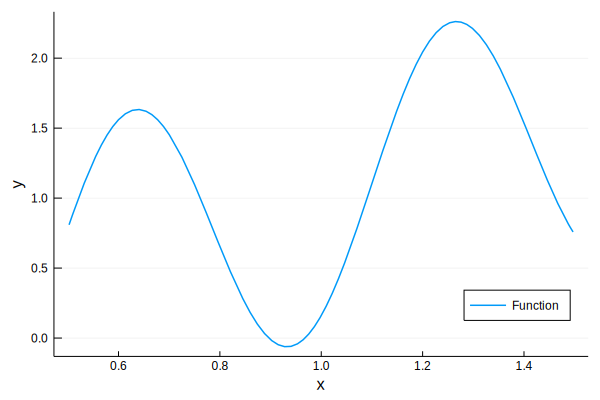

In [48]:
f = x -> x + cos(10*x);
interval = [0.5,1.5];
plot(f,interval...,label="Function",
    legend=:bottomright,grid=:y,xlabel="x",ylabel="y")

In [49]:
r = nlsolve(x->f(x[1]),[1.]).zero

1-element Array{Float64,1}:
 0.9678884021293104

We choose three values to get the iteration started.

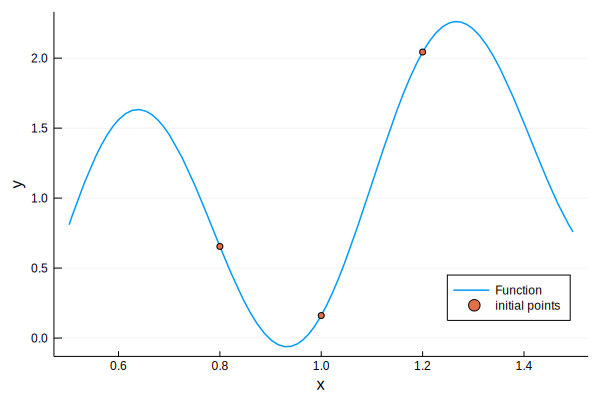

In [50]:
x = [0.8,1.2,1]
y = @. f(x)
scatter!(x,y,label="initial points")

If we were using "forward" interpolation, we would ask for the polynomial interpolant of $y$ as a function of $x$. But that parabola has no real roots. 

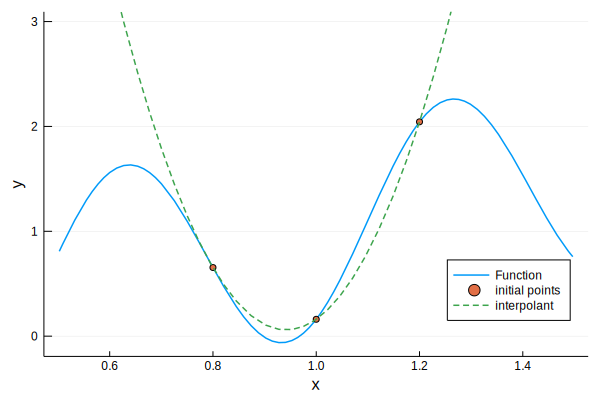

In [51]:
q = polyfit(x,y,2);      # interpolating polynomial
plot!(x->q(x),interval...,l=:dash,label="interpolant",ylim=[-.1,3])

To do inverse interpolation, we swap the roles of $x$ and $y$ in the interpolation.

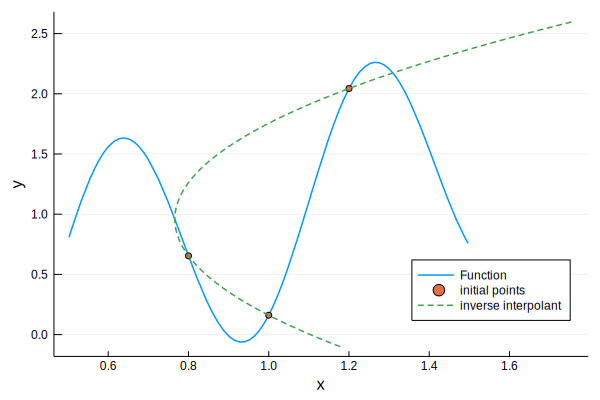

In [52]:
plot(f,interval...,grid=:y,label="Function",
    legend=:bottomright,xlabel="x",ylabel="y")
scatter!(x,y,label="initial points")

q = polyfit(y,x,2);      # interpolating polynomial
plot!(y->q(y),y->y,-.1,2.6,l=:dash,label="inverse interpolant")

We seek the value of $x$ that makes $y$ zero. This means evaluating $q$ at zero. 

In [53]:
@show x = [x; q(0)];
@show y = [y; f(x[end])];

x = [x; q(0)] = [0.8, 1.2, 1.0, 1.10398]
y = [y; f(x[end])] = [0.6545, 2.04385, 0.160928, 1.14821]


We repeat the process a few more times.

In [54]:
for k = 4:8
    q = polyfit(y[k-2:k],x[k-2:k],2)
    x = [x; q(0)]
    y = [y; f(x[k+1])]
end

Here is the sequence of errors.

In [55]:
err = @. x - r

9-element Array{Float64,1}:
 -0.16788840212931033   
  0.23211159787068958   
  0.03211159787068962   
  0.13609298331116126   
  0.015347343251992718  
  0.0032683144541432174 
  0.00046174333316018057
  6.2955671520370515e-6 
  3.1584923565475265e-9 

The error seems to be superlinear, but subquadratic.

In [56]:
logerr = @. log(abs(err));
ratios = @. logerr[2:end] / logerr[1:end-1]

8-element Array{Float64,1}:
 0.8184775454303989
 2.3542970942956387
 0.5800188686031718
 2.0942526326509623
 1.370298604275667 
 1.3419283705663598
 1.5592295620769054
 1.634412064319916 

# Example 4.5.2

Let us use Newton's method on the system defined by the function

In [57]:
function nlvalue(x)
    return [ exp(x[2]-x[1]) - 2,
          x[1]*x[2] + x[3],
          x[2]*x[3] + x[1]^2 - x[2]
        ]
end

nlvalue (generic function with 1 method)

Here is a function that computes the Jacobian matrix.

In [58]:
function nljac(x)
    J = zeros(3,3)
    J[1,:] = [-exp(x[2]-x[1]), exp(x[2]-x[1]), 0]
    J[2,:] = [x[2], x[1], 1]
    J[3,:] = [2*x[1], x[3]-1, x[2]]
    return J
end

nljac (generic function with 1 method)

(These functions could be written as separate files, or embedded within another function as we have done here.) Our initial guess at a root is the origin.

In [59]:
x = [0,0,0]

3-element Array{Int64,1}:
 0
 0
 0

We need the value (residual) of the nonlinear function, and its Jacobian, at this value for $\mathbf{x}$. 

In [60]:
@show f = nlvalue(x);
@show J = nljac(x);

f = nlvalue(x) = [-1.0, 0.0, 0.0]
J = nljac(x) = [-1.0 1.0 0.0; 0.0 0.0 1.0; 0.0 -1.0 0.0]


We solve for the Newton step and compute the new estimate. 

In [61]:
s = -(J\f)
x = [x x[:,1]+s]

3×2 Array{Float64,2}:
 0.0  -1.0
 0.0   0.0
 0.0   0.0

Here is the new residual.

In [62]:
nlvalue(x[:,2])

3-element Array{Float64,1}:
 0.7182818284590451
 0.0               
 1.0               

We don't seem to be especially close to a root. Let's iterate a few more times. 

In [63]:
for n = 2:7
    f = [f nlvalue(x[:,n])]
    s = -( nljac(x[:,n]) \ f[:,n] )
    x = [x x[:,n]+s]
end

We find the infinity norm of the residuals. 

In [64]:
residual_norm = maximum(abs.(f),dims=1)   # max in dimension 1

1×7 Array{Float64,2}:
 1.0  1.0  0.202293  0.0102521  2.15564e-5  1.98999e-10  1.38778e-17

We don't know an exact answer, so we will take the last computed value as its surrogate. 

In [65]:
r = x[:,end]
x = x[:,1:end-1]

3×7 Array{Float64,2}:
 0.0  -1.0  -0.578586  -0.463139  -0.458027  -0.458033  -0.458033
 0.0   0.0   0.157173   0.230904   0.235121   0.235114   0.235114
 0.0   0.0   0.157173   0.115452   0.107713   0.10769    0.10769 

The following will subtract r from every column of x.

In [66]:
e = x .- r

3×7 Array{Float64,2}:
  0.458033  -0.541967  -0.120553   -0.00510533  …  -1.07512e-10  0.0        
 -0.235114  -0.235114  -0.0779413  -0.00421021     -1.07432e-10  0.0        
 -0.10769   -0.10769    0.0494826   0.00776251      1.9768e-11   1.38778e-17

Now we take infinity norms and check for quadratic convergence. 

In [67]:
errs = maximum(abs.(e),dims=1)
ratios = @. log(errs[2:end]) / log(errs[1:end-1])

6-element Array{Float64,1}:
 0.7845032596064885
 3.4538622456644   
 2.296416733539853 
 2.196724973045181 
 2.1506706016502855
 1.6910878097784365

For a brief time, we see ratios around 2, but then the limitation of double precision makes it impossible for the doubling to continue. 

# Example 4.5.3

As before, the system is defined by its residual and Jacobian, but this time we implement them as a single function.

In [68]:
function nlsystem(x)
    f = [
        exp(x[2]-x[1]) - 2,
        x[1]*x[2] + x[3],
        x[2]*x[3] + x[1]^2 - x[2]
        ]
    J = [
        -exp(x[2]-x[1]) exp(x[2]-x[1]) 0;
        x[2] x[1] 1;
        2*x[1] x[3]-1 x[2]
    ]
    return f,J
end

nlsystem (generic function with 1 method)

Our initial guess is the origin. The output has one column per iteration.

In [69]:
x1 = [0,0,0]
x = FNC.newtonsys(nlsystem,x1)

3×7 Array{Float64,2}:
 0.0  -1.0  -0.578586  -0.463139  -0.458027  -0.458033  -0.458033
 0.0   0.0   0.157173   0.230904   0.235121   0.235114   0.235114
 0.0   0.0   0.157173   0.115452   0.107713   0.10769    0.10769 

The last column contains the final Newton estimate. We'll compute the residual there in order to check the quality of the result.

In [70]:
r = x[:,end]
f,J = nlsystem(r)
f

3-element Array{Float64,1}:
 0.0                   
 1.3877787807814457e-17
 0.0                   

Let's use the convergence to the first component of the root as a proxy for the convergence of the vectors.

In [71]:
@. log( 10,abs(x[1,1:end-1]-r[1]) )

6-element Array{Float64,1}:
 -0.33910296506655396
 -0.26602738143693677
 -0.9188219290579982 
 -2.2919758192847413 
 -5.192931369910553  
 -9.968541940700057  

The exponents approximately double, as is expected of quadratic convergence. 

# Example 4.6.1

To solve a nonlinear system, we need to code only the function defining the system (residual vector), and not its Jacobian.

In [72]:
function nlsystem(x)
    return [ exp(x[2]-x[1]) - 2,
          x[1]*x[2] + x[3],
          x[2]*x[3] + x[1]^2 - x[2]
        ]
end

nlsystem (generic function with 1 method)

In all other respects usage is the same as for the `newtonsys` function. 

In [73]:
x1 = [0,0,0]   
x = FNC.levenberg(nlsystem,x1)

3×12 Array{Float64,2}:
 0.0  -0.0839695  -0.422051   -0.486107   …  -0.458033  -0.458033  -0.458033
 0.0   0.0763359   0.219913    0.213897       0.235114   0.235114   0.235114
 0.0   0.0         0.0129976   0.0977187      0.10769    0.10769    0.10769 

It's always a good idea to check the accuracy of the root, by measuring the residual (backward error). 

In [74]:
r = x[:,end]
@show backward_err = norm(nlsystem(r));

backward_err = norm(nlsystem(r)) = 1.2708308198538738e-13


Looking at the convergence of the first component, we find a subquadratic convergence rate, just as with the secant method.

In [75]:
@. log( 10, abs(x[1,1:end-1]-r[1]) )

11-element Array{Float64,1}:
  -0.339102965066587 
  -0.4270543010723006
  -1.4439084186692495
  -1.5516983593341895
  -2.7571176181745702
  -2.620794767983644 
  -3.4402555412715268
  -4.994683276673789 
  -7.344833652127618 
  -8.736590992194474 
 -10.091330869104365 

# Example 4.7.1

Inhibited enzyme reactions often follow what are known as _Michaelis–Menten_ kinetics, in which a reaction rate $v$ follows a law of the form

$$v(x) = \frac{V x}{K_m + x},$$ 

where $x$ is the concentration of a substrate. The real values $V$ and $K_m$ are parameters that are free to fit to data. For this example we cook up some artificial data with $V=2$ and $K_m=1/2$.

In [76]:
m = 25;
x = range(0.05,stop=6,length=m)
y = @. 2*x/(0.5+x)                   # exactly on the curve
@. y += 0.15*cos(2*exp(x/16)*x);     # noise added

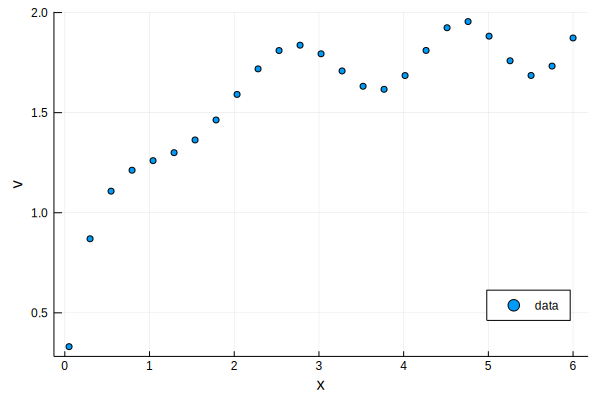

In [77]:
scatter(x,y,label="data",
     xlabel="x",ylabel="v",leg=:bottomright)

The idea is to pretend that we know nothing of the origins of this data and use nonlinear least squares on the misfit to find the parameters in the theoretical model function $v(x)$. Note in the Jacobian that the derivatives are _not_ with respect to $x$, but with respect to the two parameters, which are contained in the vector `c`.

In [78]:
function misfit(c)
    V,Km = c   # rename components for clarity
    f = @. V*x/(Km+x) - y
    J = zeros(m,2)
    J[:,1] = @. x/(Km+x)              # d/d(V)
    J[:,2] = @. -V*x/(Km+x)^2         # d/d(Km)
    return f,J
end

misfit (generic function with 1 method)

In [79]:
c1 = [1, 0.75]
c = FNC.newtonsys(misfit,c1)
@show V,Km = c[:,end]  # final values

(V, Km) = c[:, end] = [1.96865, 0.469304]


2-element Array{Float64,1}:
 1.9686525983782202 
 0.46930373074166304

The final values are close to the noise-free values of $V=2$, $K_m=0.5$ that we used to generate the data. We can calculate the amount of misfit at the end, although it's not completely clear what a "good" value would be. Graphically, the model looks reasonable.

In [80]:
model = x -> V*x/(Km+x)
final_misfit_norm = norm(@.model(x)-y) 

0.5233998076412236

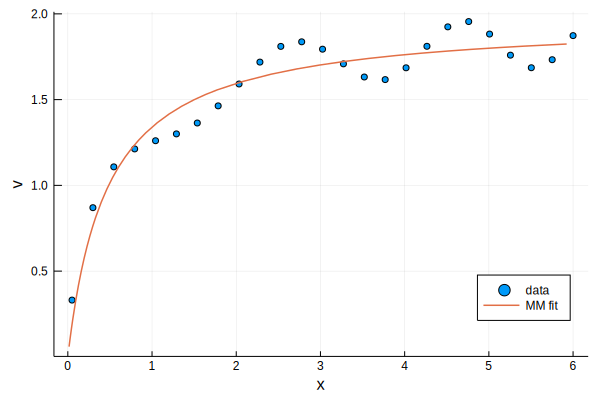

In [81]:
plot!(model,0,6,label="MM fit" )

For this model, we also have the option of linearizing the fit process. Rewrite the model as $1/v= (a/x)+b$ for the new parameters $\alpha=K_m/V$ and $\beta=1/V$. This corresponds to the misfit function whose entries are 

$$f_i(\alpha,\beta) = \alpha \cdot \frac{1}{x_i} + \beta - \frac{1}{y_i},$$ 

for $i=1,\ldots,m$. Although the misfit is nonlinear in $x$ and $y$, it's linear in the unknown parameters $\alpha$ and $\beta$, and so can be posed and solved as a linear least-squares problem.

In [82]:
A = [ x.^(-1) x.^0 ];  u = @. 1/y;
z =  A\u;
alpha,beta = z

2-element Array{Float64,1}:
 0.12476333709901535
 0.5713959100431232 

The two fits are different, because they do not optimize the same quantities. 

In [83]:
linmodel = x -> 1 / (beta + alpha/x);
final_misfit_linearized = norm(@. linmodel(x)-y)

0.748711101309756

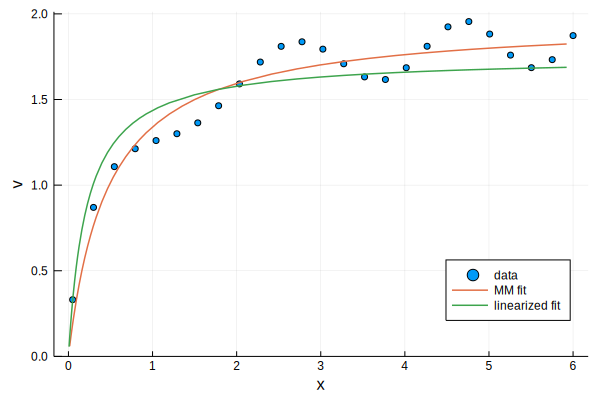

In [84]:
plot!(linmodel,0,6,label="linearized fit")